In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [2]:
df = pd.read_excel('dataset.xlsx')

from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = [
    "OverTime",
    "MaritalStatus",
    "JobRole",
    "Gender",
    "EducationField",
    "Department",
    "BusinessTravel",
    "Attrition"
]

# Initialize encoder
le = LabelEncoder()

# Store legend mapping
legend = {}

for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))
        legend[col] = dict(zip(le.classes_, range(len(le.classes_))))

# Print legend
print("=== LEGEND: String-to-Number Mapping ===\n")
for col, mapping in legend.items():
    print(f"{col}:")
    for k, v in mapping.items():
        print(f"  '{k}' → {v}")
    print()

# Display preview
print("=== SAMPLE OF ENCODED DATA ===")
df.head()

=== LEGEND: String-to-Number Mapping ===

OverTime:
  'No' → 0
  'Yes' → 1

MaritalStatus:
  'Divorced' → 0
  'Married' → 1
  'Single' → 2

JobRole:
  'Healthcare Representative' → 0
  'Human Resources' → 1
  'Laboratory Technician' → 2
  'Manager' → 3
  'Manufacturing Director' → 4
  'Research Director' → 5
  'Research Scientist' → 6
  'Sales Executive' → 7
  'Sales Representative' → 8

Gender:
  'Female' → 0
  'Male' → 1

EducationField:
  'Human Resources' → 0
  'Life Sciences' → 1
  'Marketing' → 2
  'Medical' → 3
  'Other' → 4
  'Technical Degree' → 5

Department:
  'Human Resources' → 0
  'Research & Development' → 1
  'Sales' → 2

BusinessTravel:
  'Non-Travel' → 0
  'Travel_Frequently' → 1
  'Travel_Rarely' → 2

Attrition:
  'No' → 0
  'Yes' → 1

=== SAMPLE OF ENCODED DATA ===


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PTOs Utilized
0,41,1,2,2,1,2,1,2,0,3,...,3,1,8,0,1,6,4,0,5,16
1,49,0,1,1,8,1,1,3,1,2,...,4,4,10,3,3,10,7,1,7,10
2,37,1,2,1,2,2,4,4,1,2,...,3,2,7,3,3,0,0,0,0,1
3,33,0,1,1,3,4,1,4,0,3,...,3,3,8,3,3,8,7,3,0,2
4,27,0,2,1,2,1,3,1,1,3,...,3,4,6,3,3,2,2,2,2,11


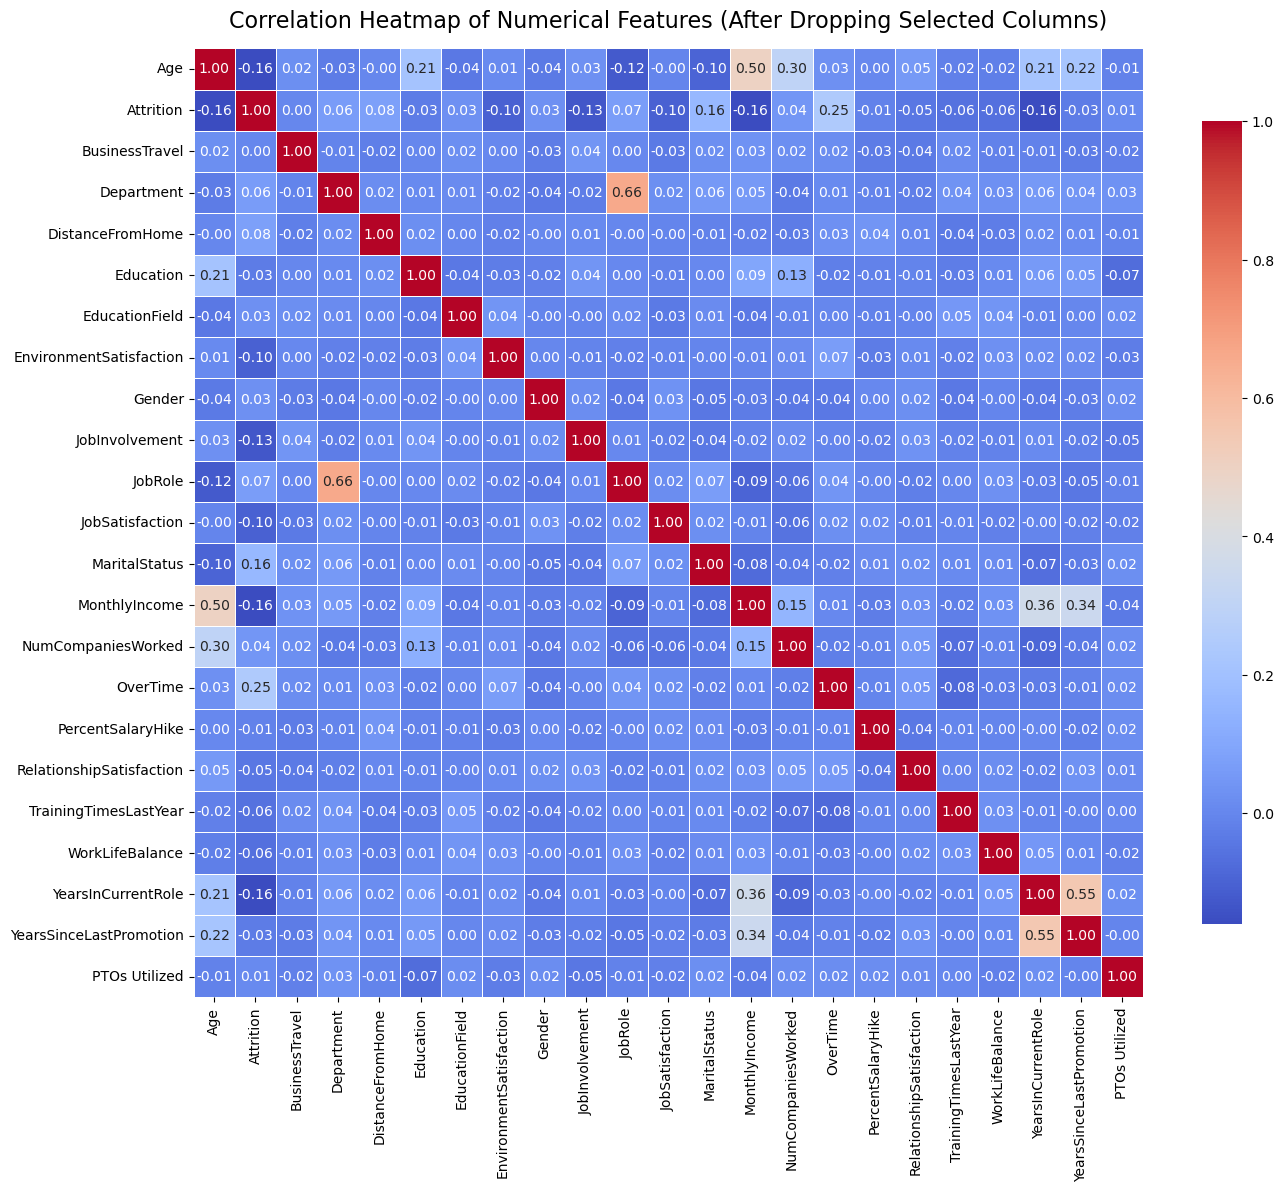

In [3]:
cols_to_drop = [ 
    "JobLevel", 
    "TotalWorkingYears",
    "PerformanceRating",
    "YearsAtCompany",
    "YearsWithCurrManager"
]

# --- Drop defined columns if they exist ---
df_filtered = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# --- Keep only numeric columns ---
numeric_df = df_filtered.select_dtypes(include=['number'])

# --- Compute correlation matrix ---
corr_matrix = numeric_df.corr()

# --- Plot heatmap ---
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    annot=True,           # show correlation coefficients
    fmt=".2f",            # 2 decimal places
    cmap="coolwarm",      # color palette
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap of Numerical Features (After Dropping Selected Columns)", fontsize=16, pad=15)
plt.tight_layout()
plt.show()

In [4]:
df = numeric_df.copy()

In [5]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_bal, y_bal = smt.fit_resample(X, y)

y_bal.value_counts()

Attrition
1    1142
0    1142
Name: count, dtype: int64

In [6]:
# new balanced dataframe

df_balanced = pd.concat([X_bal, y_bal], axis=1)
df_balanced

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,PTOs Utilized,Attrition
0,41,2,2,1,2,1,2,0,3,7,...,8,1,11,1,0,1,4,0,16,1
1,49,1,1,8,1,1,3,1,2,6,...,1,0,23,4,3,3,7,1,10,0
2,37,2,1,2,2,4,4,1,2,2,...,6,1,15,2,3,3,0,0,1,1
3,33,1,1,3,4,1,4,0,3,6,...,1,1,11,3,3,3,7,3,2,0
4,27,2,1,2,1,3,1,1,3,2,...,9,0,12,4,3,3,2,2,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,24,2,1,12,1,4,4,0,3,6,...,1,0,17,1,2,2,2,2,12,1
2280,33,0,2,18,3,2,1,0,3,7,...,7,0,13,2,3,2,2,0,12,1
2281,47,1,1,1,4,3,3,1,3,6,...,3,1,14,3,3,3,0,0,19,1
2282,23,2,1,5,1,2,2,0,3,7,...,2,0,12,2,3,3,0,0,12,1


In [7]:
df = df_balanced.copy()

In [8]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# --- Define target column ---
target_col = "Attrition"

# --- Use the balanced dataset ---
# (Assuming X_bal and y_bal are already defined and preprocessed)
X = X_bal
y = y_bal

# --- Encode target if it's categorical ---
if y.dtype == "object":
    le = LabelEncoder()
    y = le.fit_transform(y)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

# --- LazyClassifier ---
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# --- Display results ---
print("✅ Model Comparison Results:")
display(models)

  0%|          | 0/31 [00:00<?, ?it/s]

  File "c:\Users\junni\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\junni\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[LightGBM] [Info] Number of positive: 809, number of negative: 789
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 488
[LightGBM] [Info] Number of data points in the train set: 1598, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506258 -> initscore=0.025033
[LightGBM] [Info] Start training from score 0.025033
✅ Model Comparison Results:


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.91,0.91,0.91,0.91,0.09
XGBClassifier,0.90,0.90,0.90,0.90,0.14
ExtraTreesClassifier,0.90,0.90,0.90,0.90,0.13
RandomForestClassifier,0.89,0.89,0.89,0.89,0.16
SVC,0.88,0.88,0.88,0.88,0.06
NuSVC,0.86,0.86,0.86,0.86,0.06
BaggingClassifier,0.85,0.85,0.85,0.85,0.05
LabelPropagation,0.83,0.83,0.83,0.83,0.08
LabelSpreading,0.83,0.83,0.83,0.83,0.09


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 799, number of negative: 799
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 476
[LightGBM] [Info] Number of data points in the train set: 1598, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report:

              precision    recall  f1-score   support

           0     0.8789    0.9096    0.8940       343
           1     0.9063    0.8746    0.8902       343

    accuracy                         0.8921       686
   macro avg     0.8926    0.8921    0.8921       686
weighted avg     0.8926    0.8921    0.8921       686



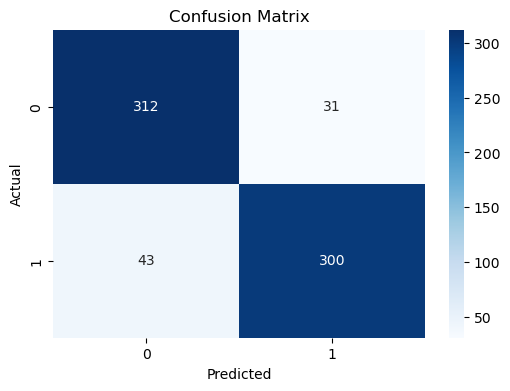

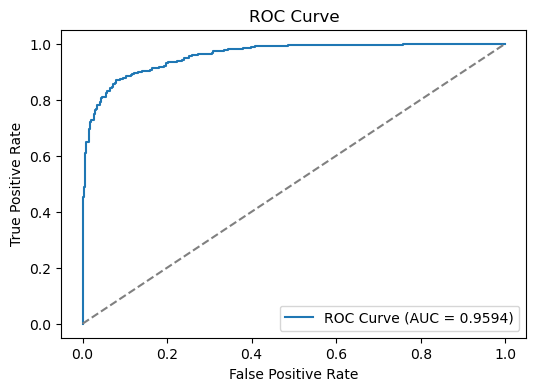

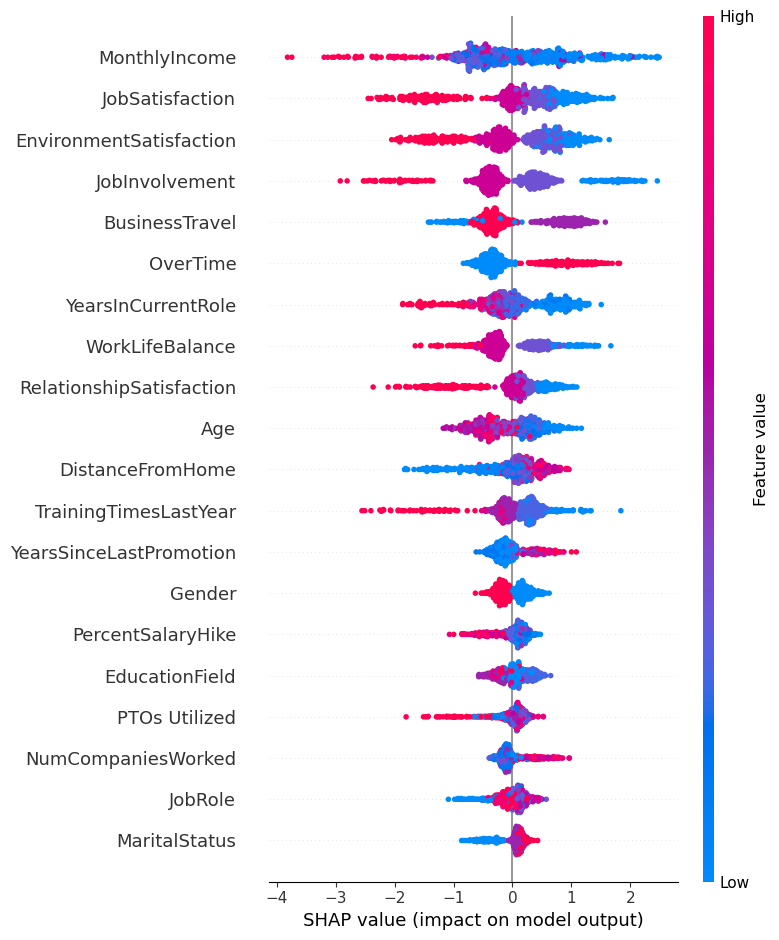

In [9]:
# ----------------------------------------
# 1. Import Libraries
# ----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, classification_report
)
from lightgbm import LGBMClassifier

# ----------------------------------------
# 2. Prepare Data
# ----------------------------------------
X = df.drop(columns=['Attrition'])   # Replace 'Attrition' with your target column if different
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------------------
# 3. Train LGBMClassifier
# ----------------------------------------
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# ----------------------------------------
# 4. Predictions and Metrics
# ----------------------------------------
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# ----------------------------------------
# 5. Confusion Matrix
# ----------------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ----------------------------------------
# 6. ROC Curve and AUC
# ----------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# ----------------------------------------
# 7. SHAP Summary Plot
# ----------------------------------------
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="dot")


In [10]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

# --- Define target column ---
target_col = "YearsInCurrentRole"

# --- Use the balanced dataset ---
# (Assuming X_bal and y_bal are already defined and preprocessed)
X = X_bal
y = y_bal

# --- Convert to float32 (as in diabetes example) ---
X = X.astype(np.float32)
y = y.astype(np.float32)

# --- Shuffle and Split the dataset (70/30) ---
X, y = shuffle(X, y, random_state=13)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- Run LazyRegressor ---
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# --- Display results ---
print("✅ Model Comparison Results (70/30 Split):")
display(models)


  0%|          | 0/42 [00:00<?, ?it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 488
[LightGBM] [Info] Number of data points in the train set: 1598, number of used features: 22
[LightGBM] [Info] Start training from score 0.498123
✅ Model Comparison Results (70/30 Split):


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.68,0.69,0.28,0.32
LGBMRegressor,0.67,0.68,0.28,0.08
XGBRegressor,0.67,0.68,0.28,0.07
NuSVR,0.64,0.65,0.30,0.13
SVR,0.63,0.64,0.30,0.10
ExtraTreesRegressor,0.62,0.63,0.30,0.24
RandomForestRegressor,0.61,0.62,0.31,0.40
GradientBoostingRegressor,0.57,0.58,0.32,0.18
BaggingRegressor,0.56,0.57,0.33,0.05


In [11]:
df = df_balanced.copy()

📊 Regression Performance Metrics:
MAE:  1.8730
MSE:  7.4369
RMSE: 2.7271
R²:   0.3652


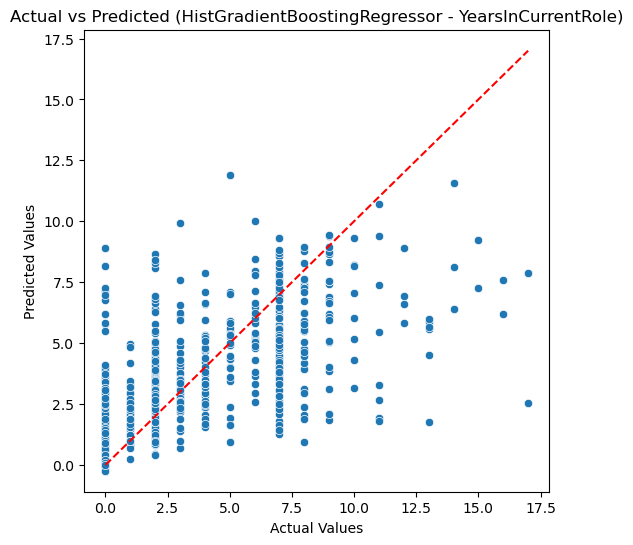

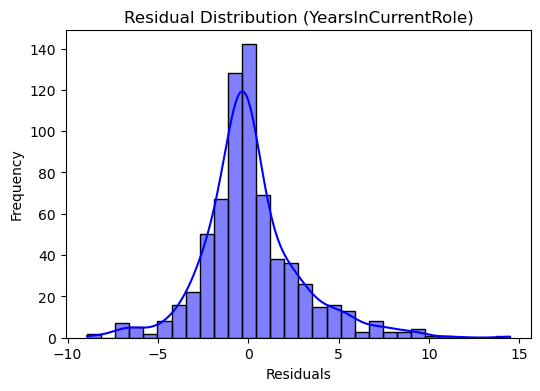

In [12]:
# ----------------------------------------
# 1. Import Libraries
# ----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.ensemble import HistGradientBoostingRegressor

# ----------------------------------------
# 2. Prepare Data
# ----------------------------------------
X = df.drop(columns=['YearsInCurrentRole', "Attrition", "YearsSinceLastPromotion"])   # Target column removed from features
y = df['YearsInCurrentRole']                  # Target column set to YearsInCurrentRole

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ----------------------------------------
# 3. Train HistGradientBoostingRegressor
# ----------------------------------------
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# ----------------------------------------
# 4. Predictions and Metrics
# ----------------------------------------
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Regression Performance Metrics:")
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

# ----------------------------------------
# 5. Actual vs Predicted Plot
# ----------------------------------------
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (HistGradientBoostingRegressor - YearsInCurrentRole)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# ----------------------------------------
# 6. Residual Plot
# ----------------------------------------
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=30, color="blue")
plt.title("Residual Distribution (YearsInCurrentRole)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()



🔎 Top Feature Importances:


,Feature,Importance
12,MonthlyIncome,0.47
13,NumCompaniesWorked,0.19
0,Age,0.05
18,WorkLifeBalance,0.03
15,PercentSalaryHike,0.02
3,DistanceFromHome,0.02
6,EnvironmentSatisfaction,0.01
19,PTOs Utilized,0.01
17,TrainingTimesLastYear,0.01
4,Education,0.01


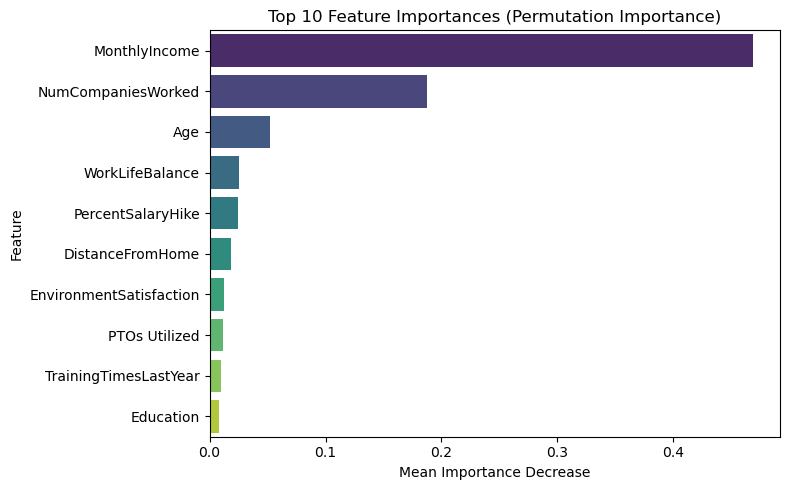

In [13]:
from sklearn.inspection import permutation_importance

# ----------------------------------------
# 7. Permutation Feature Importance
# ----------------------------------------
r = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Convert to DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': r.importances_mean
}).sort_values(by='Importance', ascending=False)

# Display top features
print("\n🔎 Top Feature Importances:")
display(feature_importance.head(10))

# Plot Feature Importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title("Top 10 Feature Importances (Permutation Importance)")
plt.xlabel("Mean Importance Decrease")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
